In [18]:
from langchain.llms import OpenAI 
from dotenv import load_dotenv
from pathlib import Path
import os
load_dotenv()
dotenv_path = Path('.env_secure')
load_dotenv(dotenv_path=dotenv_path)
open_api_key = os.environ.get('OPENAI_API_KEY')
dotenv_path = Path('.env_rag_0003')
load_dotenv(dotenv_path=dotenv_path)
max_filename_length = int(os.environ.get('MAX_FILENAME_LENGTH'))
url_strip_num_characters = int(os.environ.get('URL_STRIP_NUM_CHARACTERS'))
file_indicator_size = int(os.environ.get('FILE_INDICATOR_SIZE'))
text_chunk_size = int(os.environ.get('TEXT_CHUNK_SIZE'))
text_chunk_overlap = int(os.environ.get('TEXT_CHUNK_OVERLAP'))
output_directory = os.environ.get('OUTPUT_DIRECTORY')
file_selection = os.environ.get("FILE_SELECTION")
url_file_name = os.environ.get('URL_FILE_NAME') + '_' + file_selection + '.txt'
query_file_name = os.environ.get('QUERY_FILE_NAME') + '_' + file_selection + '.txt'
input_directory = os.environ.get('INPUT_DIRECTORY')
max_documents = int(os.environ.get('MAX_DOCUMENTS'))

In [19]:
# Set logging for the queries
import logging
logging.basicConfig(level=logging.INFO)
logging.getLogger('langchain.retrievers.multi_query').setLevel(logging.INFO)
logging.debug('test debug')
logging.info('test info')
logging.warning('test warning')
logging.error('test error')
logging.critical('test critical')

INFO:root:test info
ERROR:root:test error
CRITICAL:root:test critical


In [20]:

from bs4 import BeautifulSoup as bs
from langchain.docstore.document import Document
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
someCounter = 0
maxCounter = 0


In [21]:

def get_file_contents(specified_file_name):
    file_full_name = './' + input_directory + '/' + specified_file_name
    text_file = open(file_full_name, "r")
    data = text_file.read()
    all_lines = data.splitlines()
    return all_lines

#def get_query():
#    query_full_name = './' + input_directory + '/' + query_file_name
#    logging.info(query_full_name)
##    text_file = open(query_full_name, "r")
##    data = text_file.read()
#    all_lines = data.splitlines()
#    return all_lines

In [22]:
def clear_files():
    cleared_count = 0
    dir = './' + output_directory
    for f in os.listdir(dir):
        os.remove(os.path.join(dir,f))
        cleared_count += 1
    return cleared_count


In [23]:
def flush_files(base_text, base_name):
    global someCounter
    global maxCounter
    string_split = str(someCounter).zfill(file_indicator_size)
    filename = base_name + string_split
    try:
        f = open(f"./{output_directory}/{filename}.txt", "x")
        f.write(base_text)
        f.close()
        maxCounter += 1
    except:
        logging.info('file exists, skipping')
        return False
    return True

In [24]:
#this gets text from dynamic or static web page
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless=new")
def retrieve_text_from_url(inbound_url):
    driver = webdriver.Chrome(options=options)
    driver.get(inbound_url)
    html = driver.page_source
    soup = bs(html)
    print(soup)
    all_text = ''
    for tag in soup.find_all('p'):
        all_text += tag.text + '\n'
    return(all_text)


In [25]:
ret = clear_files()
print(f"{ret} old files cleared")

40 old files cleared


In [26]:
class StopExecution(Exception):
    def _render_traceback_(self):
        return []

def check_f(file_to_be_checked):
    full_file_to_be_checked = './' + input_directory + '/' + file_to_be_checked
    check_file = os.path.isfile(full_file_to_be_checked)
    print(check_file)
    if (not(check_file)):
        print(f'error on file {full_file_to_be_checked}')
        raise StopExecution

check_f(url_file_name)
check_f(query_file_name)

True
True


In [27]:
url_list = get_file_contents(url_file_name)
print(url_list)
query_list = get_file_contents(query_file_name)
print(query_list)


['https://www.cbsnews.com/news/kristin-harila-responds-dying-sherpa-record-fastest-to-summit-14-highest-peaks/', 'https://www.theguardian.com/world/2023/aug/10/record-speed-mountaineer-denies-climbing-over-dying-sherpa-on-k2', 'https://www.dailymail.co.uk/news/article-12397447/Norwegian-mountaineer-denies-suggestions-stepped-tragic-K2-porter-world-record-climb-blasts-hatred-faced-celebrating-top.html', 'https://www.independent.co.uk/asia/south-asia/k2-sherpa-dying-harila-latest-b2391584.html', 'https://nypost.com/2023/08/11/mountaineer-kristin-harila-denies-ignoring-dying-man-in-k2-climb/']
['Was Kristin Harila accused of climbing over a porter.  What are the details?', 'Why did the rope-fixing team decide it would be safe to split up?', 'Why did Ms Harila state that it was not possible to help?']


In [28]:

url_alternate_names = []
for aitem in url_list:
    aitem_short = aitem[url_strip_num_characters:]
    aitem_short = aitem_short.replace("/", "_")
    aitem_short = aitem_short[:max_filename_length]
    url_alternate_names.append(aitem_short)
print(url_alternate_names)


['www.cbsnews.com_news_kristin-h', 'www.theguardian.com_world_2023', 'www.dailymail.co.uk_news_artic', 'www.independent.co.uk_asia_sou', 'nypost.com_2023_08_11_mountain']


<html class="theme--responsive device--type-desktop device--platform-web device--size- content--type-article context--slug-kristin-harila-responds-dying-sherpa-record-fastest-to-summit-14-highest-peaks page--type-news-item edition--us smart-banner-breaking-news--visible soft-login-gate--hidden" lang="en-US"><head prefix="og: https://ogp.me/ns#"><meta charset="utf-8"/><title>
    Climber Kristin Harila responds after critics accuse her of walking past dying porter to set world record - CBS News</title><!-- Fly Version: 170b469460f9b5b4a2670b02bb591e2d --><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, user-scalable=0" name="viewport"/><meta content="only light" name="color-scheme"/><meta content="index, follow, max-image-preview:large" name="robots"/><meta content="Kristin Harila said she felt the need to give her side of the story due to &amp;quot;all of the misinformation and hatred that is now being spread&amp;quot;, including &amp;quot;death thr
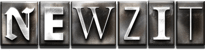
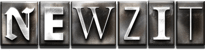

In [29]:
#once we have a text chunk then we need to save it to a file
#def flush_files(base_text, base_name):
import time

for someUrl in enumerate(url_list):
    global someCounter
    someCounter = 0 
    url_name = someUrl[1]
    url_index = someUrl[0]
    all_text_from_url = retrieve_text_from_url(url_name)
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=text_chunk_size, chunk_overlap=text_chunk_overlap)
    someSplit = text_splitter.split_text(all_text_from_url)
    for one_text in someSplit:
        if(maxCounter >= max_documents):
            break
        ret_val = flush_files(one_text, url_alternate_names[url_index])
        someCounter += 1
    time.sleep(5)



In [13]:
#from langchain.text_splitter import CharacterTextSplitter
#def get_text_chunks_langchain(text):
#   text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=100)
#   docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
#   return docs

In [30]:
for specific_query in query_list:
    print(specific_query)
    llm = OpenAI(temperature=0)
    print(llm(specific_query))

Was Kristin Harila accused of climbing over a porter.  What are the details?


No, Kristin Harila was not accused of climbing over a porter. There are no details available about this incident.
Why did the rope-fixing team decide it would be safe to split up?


The rope-fixing team decided it would be safe to split up because they had a plan in place to ensure that each team member was safe and that they could communicate with each other if needed. They also had the necessary safety equipment and knew the terrain well enough to be able to navigate it safely.
Why did Ms Harila state that it was not possible to help?


Ms Harila stated that it was not possible to help because the situation was outside of her jurisdiction and she did not have the authority to intervene.


In [31]:
from langchain.document_loaders import TextLoader

file_path = './' + output_directory
# Load multiple files
loaders = [TextLoader(os.path.join(file_path, fn)) for fn in os.listdir(file_path)]
print(loaders)

all_documents = []
for loader in loaders:
    print("Loading raw document" + loader.file_path)
    raw_documents = loader.load()
    all_documents.extend(raw_documents)

print(all_documents)


[<langchain.document_loaders.text.TextLoader object at 0x000002101A969A90>, <langchain.document_loaders.text.TextLoader object at 0x000002101A9696D0>, <langchain.document_loaders.text.TextLoader object at 0x000002101DC5C250>, <langchain.document_loaders.text.TextLoader object at 0x000002101DC5CAD0>, <langchain.document_loaders.text.TextLoader object at 0x000002101DC5C750>, <langchain.document_loaders.text.TextLoader object at 0x000002101DC5D410>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEDBD0>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEFAD0>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEEED0>, <langchain.document_loaders.text.TextLoader object at 0x000002101DC5C190>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEF150>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEEC50>, <langchain.document_loaders.text.TextLoader object at 0x000002101BEEF610>, <langchain.document_load

https://www.independent.co.uk/asia/south-asia/k2-sherpa-dying-harila-latest-b2391584.html
section:
She added that the accident had occurred on “a very, very narrow trail” and said it was “impossible” for 10 people to help “because [there] is only room for one behind and one in front”.
But having received radio messages that their rope-fixing team were having problems up ahead following an avalanche, they decided it would be safer to split up and for Ms Harila to continue the ascent, rather than potentially block the narrow passage and impede any rescue attempts. Following the radio messages, Ms Harila said, “We had to make a decision to split up.”

NOTE:  We are feeding in the entire set of documents, we are not trying to find applicable documents in a similarity search, which will come later.

In [32]:

from langchain.chains.question_answering import load_qa_chain
chain = load_qa_chain(llm, chain_type='stuff')

for specific_query in query_list:

    response = chain.run(input_documents=all_documents, question=specific_query)
    print(specific_query)
    print(response + "\n")
    print()




Was Kristin Harila accused of climbing over a porter.  What are the details?
 Yes, Kristin Harila was accused of climbing over a porter, Mohammed Hassan, who lay dying on K2. Critics accused her of being more interested in setting records than helping Hassan, but Harila has denied the allegations, saying her team did everything they could to save him. Video footage showed climbers walking over Hassan's body instead of trying to rescue him, but Harila said conditions were too dangerous to move him.


Why did the rope-fixing team decide it would be safe to split up?
 The rope-fixing team decided to split up because they believed Hassan would be getting all the help he could and that he would be able to get down. They also needed to get more oxygen for their own safety.


Why did Ms Harila state that it was not possible to help?
 Ms Harila stated that it was not possible to help because the conditions were too dangerous to move Hassan, the narrow trail and poor snow conditions made it dif